In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
raw_data_path=os.path.join('.','data','raw')

In [3]:
train_data_file_path = os.path.join(raw_data_path, 'SCRM_timeSeries_2018_train.csv')
test_data_file_path = os.path.join(raw_data_path, 'SCRM_timeSeries_2018_test.csv')

In [4]:
#Read the data
df_train = pd.read_csv(train_data_file_path)
df_test = pd.read_csv(test_data_file_path)

In [5]:
%timeit
df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'],infer_datetime_format=True)#.apply(lambda x: x.date())

In [6]:
df_train.head()

,Timestamp,RI_Supplier1,RI_Distributor1,RI_Manufacturer1,RI_Retailer1,Total_Cost,SCMstability_category
0,2018-02-09 12:44:39,1.6396,1.0422,3.1884,3.3609,133.06,4
1,2018-02-09 12:46:39,1.6399,1.0444,3.1877,3.3642,135.02,4
2,2018-02-09 12:48:39,1.6398,1.0422,3.1880,3.3676,135.36,4
3,2018-02-09 12:50:39,1.6403,1.0356,3.1877,3.3705,136.22,4
4,2018-02-09 12:52:39,1.6396,1.0595,3.1888,3.3731,136.48,4


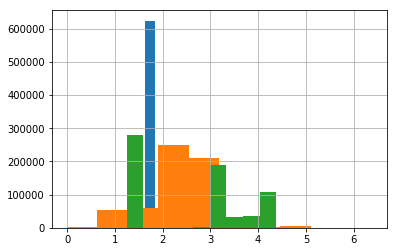

In [13]:
df_train['RI_Supplier1'].hist()
df_train['RI_Distributor1'].hist()
df_train['RI_Manufacturer1'].hist()

In [17]:
# Find number sales by Month, year, date - Group data by Month start date and agg sales.

# Convert Timestamp data type object to Date Time data type.
%timeit
df_train['Timestamp'] = pd.to_datetime(df_train['Timestamp'],infer_datetime_format=True)#.apply(lambda x: x.date())

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649999 entries, 0 to 649998
Data columns (total 7 columns):
Timestamp                649999 non-null datetime64[ns]
RI_Supplier1             649971 non-null float64
RI_Distributor1          616624 non-null float64
RI_Manufacturer1         649817 non-null float64
RI_Retailer1             649841 non-null float64
Total_Cost               614518 non-null float64
SCMstability_category    649999 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 34.7 MB


In [28]:
df_train['Timestamp']=df_train['Timestamp'].dt.date

In [37]:
df_train.reset_index(drop=True, inplace=True)

In [39]:
#

In [67]:
#df_train['#Sales']=
df_train=df_train.groupby('Timestamp')['Timestamp'].agg({'Timestamp':['count']}).rename(columns={'count':'#Sales'})

C:\Users\vmuttine\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [69]:
df_train.columns=df_train.columns.droplevel(0)


In [73]:
df_train[df_train['#Sales']==0]

,#Sales
Timestamp,


In [77]:
#df_train['#Sales'].plot(figsize=(100,600))